# REST API
- Representational State Transfer
- Client와 Server가 통신하기 위한 URL 구조에 대한 정의 및 디자인

## 1\. Kakao API

### 1-1. request token 얻기
- `https://developers.kakao.com/`
- 내 애플리케이션 > 애플리케이션 추가하기

### 1-2. KoGPT
- 문서 > KoGPT > REST API
- tokens : 공백을 제외한 글자수

#### 1. 다음문장 만들기

#### 2. 문장 분류하기
- 문장 마다 `=긍정`, `=부정` 문자열 작성
- 분류할 마지막 문장 `=` 문자열 작성

#### 3. 뉴스 한 줄 요약하기
- 마지막에 `한줄 요약:` 문자열 작성

#### 4. 질문에 답변하기
- 문장 마지막에 `?:` 로 끝남

#### 5. 응용하기

## 2\. Naver API
- 통합검색어 트렌드 API
    - https://datalab.naver.com/
    - https://datalab.naver.com/keyword/trendSearch.naver

In [4]:
import pandas as pd
import requests
import json

### 2-1. Request Token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

In [14]:
CLIENT_ID,CLIENT_SECRET='ls0mqEMJzbFFPPWeHBhe','JNUXATau23'

### 2-2. 통합검색어 트렌드 API
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [6]:
# 1. url
url = 'https://openapi.naver.com/v1/datalab/search'

In [24]:
# 2. request > response(json)
params = {
    'startDate': '2018-01-01', 'endDate': '2023-12-31', 'timeUnit': 'month',
    'keywordGroups': [
        {'groupName': '트위터', 'keywords': ['트위터', '트윗']},
        {'groupName': '페이스북', 'keywords': ['페이스북', '페북']},
        {'groupName': '인스타그램', 'keywords': ['인스타그램', '인스타']},
    ]
}
headers = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': CLIENT_ID,
    'X-Naver-Client-Secret': CLIENT_SECRET,
}
response = requests.post(url, data=json.dumps(params),headers=headers)
response

<Response [200]>

In [26]:
#한글일 경우 깨질수 있어서 이렇게 써줘야 함
json.dumps(params)

'{"startDate": "2018-01-01", "endDate": "2023-12-31", "timeUnit": "month", "keywordGroups": [{"groupName": "\\ud2b8\\uc704\\ud130", "keywords": ["\\ud2b8\\uc704\\ud130", "\\ud2b8\\uc717"]}, {"groupName": "\\ud398\\uc774\\uc2a4\\ubd81", "keywords": ["\\ud398\\uc774\\uc2a4\\ubd81", "\\ud398\\ubd81"]}, {"groupName": "\\uc778\\uc2a4\\ud0c0\\uadf8\\ub7a8", "keywords": ["\\uc778\\uc2a4\\ud0c0\\uadf8\\ub7a8", "\\uc778\\uc2a4\\ud0c0"]}]}'

In [30]:
# 3. parsing
data=response.json()['results']
data

[{'title': '트위터',
  'keywords': ['트위터', '트윗'],
  'data': [{'period': '2018-01-01', 'ratio': 14.59502},
   {'period': '2018-02-01', 'ratio': 13.0238},
   {'period': '2018-03-01', 'ratio': 12.97953},
   {'period': '2018-04-01', 'ratio': 12.82991},
   {'period': '2018-05-01', 'ratio': 13.05391},
   {'period': '2018-06-01', 'ratio': 13.34512},
   {'period': '2018-07-01', 'ratio': 13.02773},
   {'period': '2018-08-01', 'ratio': 13.45399},
   {'period': '2018-09-01', 'ratio': 12.83755},
   {'period': '2018-10-01', 'ratio': 13.05677},
   {'period': '2018-11-01', 'ratio': 12.77338},
   {'period': '2018-12-01', 'ratio': 12.86931},
   {'period': '2019-01-01', 'ratio': 13.31172},
   {'period': '2019-02-01', 'ratio': 11.74776},
   {'period': '2019-03-01', 'ratio': 11.82313},
   {'period': '2019-04-01', 'ratio': 12.32991},
   {'period': '2019-05-01', 'ratio': 12.43771},
   {'period': '2019-06-01', 'ratio': 13.29913},
   {'period': '2019-07-01', 'ratio': 14.00593},
   {'period': '2019-08-01', 'ratio

In [36]:
# 4. preprocessing
dfs=[]
for row in data:
    df=pd.DataFrame(row['data'])
    df['title']=row['title']
    dfs.append(df)

In [46]:
#len(dfs),dfs[2]
result=pd.concat(dfs,ignore_index=True)
result.tail(2)

,period,ratio,title
214,2023-11-01,23.18797,인스타그램
215,2023-12-01,21.84237,인스타그램


In [60]:
pivot_df=result.pivot(index='period',columns='title',values='ratio')
pivot_df.columns=['instagram','twitter','facebook']
pivot_df.tail(2)

,instagram,twitter,facebook
period,,,
2023-11-01,23.18797,22.86116,9.97093
2023-12-01,21.84237,23.01963,10.12856


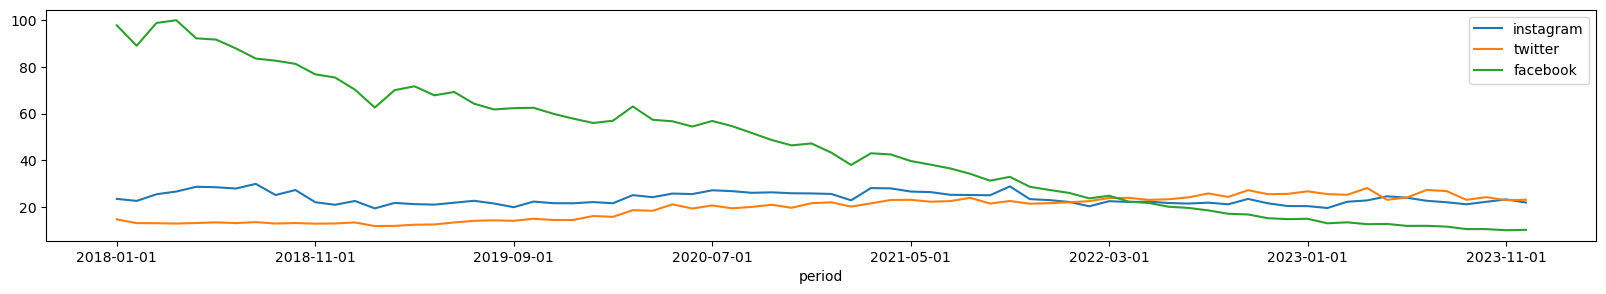

In [64]:
import matplotlib.pyplot as plt
pivot_df.plot(figsize=(20,3))
plt.show()